In [2]:
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Define the team name (e.g., 'Real Madrid')
team_name = 'Real Madrid'

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')
cursor = conn.cursor()

# Execute an SQL query to retrieve relevant data for the specified team
cursor.execute('''
SELECT
    season,
    strftime('%Y-%m', Date) AS Month,
    SUM(CASE WHEN HomeTeam = ? THEN FTHG ELSE FTAG END) - SUM(CASE WHEN AwayTeam = ? THEN FTHG ELSE FTAG END) AS GoalDifference,
    SUM(CASE WHEN HomeTeam = ? AND FTR = 'H' THEN 3 WHEN AwayTeam = ? AND FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS TotalPoints
FROM
    matchs
WHERE
    (HomeTeam = ? OR AwayTeam = ?)
GROUP BY
    season, Month
ORDER BY
    season, Month
''', (team_name, team_name, team_name, team_name, team_name, team_name))

# Fetch the results
results = cursor.fetchall()
results

[(2006, '2005-08', 1.0, 3),
 (2006, '2005-09', 3.0, 6),
 (2006, '2005-10', 6.0, 9),
 (2006, '2005-11', -2.0, 4),
 (2006, '2005-12', 2.0, 7),
 (2006, '2006-01', 5.0, 10),
 (2006, '2006-02', 8.0, 9),
 (2006, '2006-03', 5.0, 9),
 (2006, '2006-04', 2.0, 9),
 (2006, '2006-05', 0.0, 4),
 (2007, '2006-08', 0.0, 1),
 (2007, '2006-09', 6.0, 9),
 (2007, '2006-10', 3.0, 7),
 (2007, '2006-11', 5.0, 9),
 (2007, '2006-12', -2.0, 6),
 (2007, '2007-01', -1.0, 6),
 (2007, '2007-02', 0.0, 5),
 (2007, '2007-03', 2.0, 5),
 (2007, '2007-04', 6.0, 12),
 (2007, '2007-05', 5.0, 12),
 (2007, '2007-06', 2.0, 4),
 (2008, '2007-08', 1.0, 3),
 (2008, '2007-09', 10.0, 13),
 (2008, '2007-10', 7.0, 9),
 (2008, '2007-11', -1.0, 4),
 (2008, '2007-12', 6.0, 12),
 (2008, '2008-01', 7.0, 12),
 (2008, '2008-02', 3.0, 3),
 (2008, '2008-03', 2.0, 9),
 (2008, '2008-04', 6.0, 10),
 (2008, '2008-05', 7.0, 10),
 (2009, '2008-08', -1.0, 0),
 (2009, '2008-09', 10.0, 12),
 (2009, '2008-10', 2.0, 7),
 (2009, '2008-11', -1.0, 7),
 (2

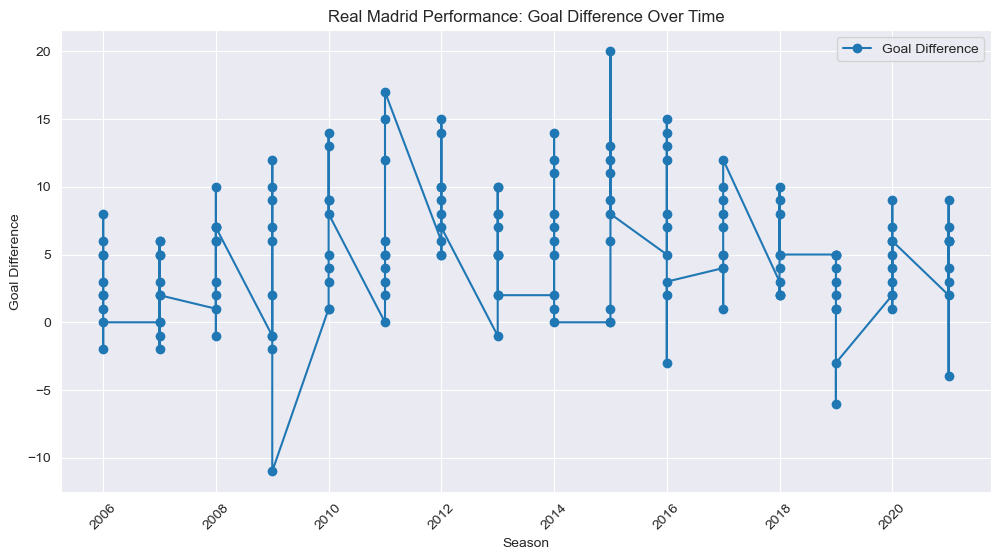

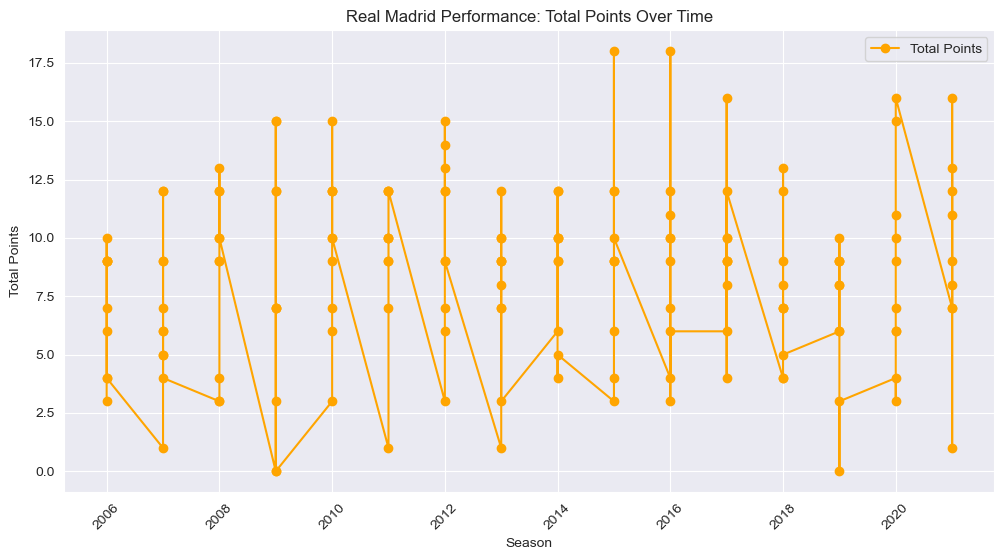

In [5]:
# Extract season, month, and performance metrics from the results
seasons = [row[0] for row in results]
months = [row[1] for row in results]
goal_differences = [row[2] for row in results]
total_points = [row[3] for row in results]

# Create line charts to visualize the team's performance metrics over time
plt.figure(figsize=(12, 6))
plt.plot(seasons, goal_differences, marker='o', linestyle='-', label='Goal Difference')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title(f'{team_name} Performance: Goal Difference Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(seasons, total_points, marker='o', linestyle='-', label='Total Points', color='orange')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title(f'{team_name} Performance: Total Points Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [6]:
# Define the performance metric to analyze (e.g., 'TotalPoints' or 'GoalDifference')
performance_metric = 'TotalPoints'

In [7]:
# Execute an SQL query to retrieve relevant data for all teams and seasons
cursor.execute('''
SELECT
    season,
    HomeTeam AS Team,
    SUM(CASE WHEN FTR = 'H' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsHome,
    SUM(CASE WHEN FTR = 'H' THEN FTHG ELSE 0 END) AS GoalsForHome,
    SUM(CASE WHEN FTR = 'H' THEN FTAG ELSE 0 END) AS GoalsAgainstHome,
    SUM(CASE WHEN FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsAway,
    SUM(CASE WHEN FTR = 'A' THEN FTAG ELSE 0 END) AS GoalsForAway,
    SUM(CASE WHEN FTR = 'A' THEN FTHG ELSE 0 END) AS GoalsAgainstAway
FROM
    matchs
GROUP BY
    season, Team
ORDER BY
    season, Team
''')

# Fetch the results
results = cursor.fetchall()

In [8]:
# Extract season, team, and performance metrics from the results
seasons = [row[0] for row in results]
teams = [row[1] for row in results]
points_home = [row[2] for row in results]
goals_for_home = [row[3] for row in results]
goals_against_home = [row[4] for row in results]
points_away = [row[5] for row in results]
goals_for_away = [row[6] for row in results]
goals_against_away = [row[7] for row in results]

# Calculate the total points and goal differences for each team in each season
if performance_metric == 'TotalPoints':
    total_points = [points_home[i] + points_away[i] for i in range(len(points_home))]
    performance_values = total_points
else:
    goal_differences = [(goals_for_home[i] + goals_for_away[i]) - (goals_against_home[i] + goals_against_away[i]) for i in range(len(goals_for_home))]
    performance_values = goal_differences

# Identify teams that consistently perform better or worse
consistent_teams = {}
for i, team in enumerate(teams):
    if team not in consistent_teams:
        consistent_teams[team] = {'Seasons': [seasons[i]], 'PerformanceValues': [performance_values[i]]}
    else:
        consistent_teams[team]['Seasons'].append(seasons[i])
        consistent_teams[team]['PerformanceValues'].append(performance_values[i])

# Analyze and print teams with consistent better or worse performance
for team, data in consistent_teams.items():
    min_performance = min(data['PerformanceValues'])
    max_performance = max(data['PerformanceValues'])
    if min_performance < max_performance:
        print(f"{team}: Consistently performs better with a minimum {performance_metric} of {min_performance} and maximum {performance_metric} of {max_performance}.")
    elif min_performance > max_performance:
        print(f"{team}: Consistently performs worse with a minimum {performance_metric} of {min_performance} and maximum {performance_metric} of {max_performance}.")
    else:
        print(f"{team}: Performance varies across seasons with a consistent {performance_metric} of {min_performance}.")

AEK: Consistently performs better with a minimum TotalPoints of 40 and maximum TotalPoints of 48.
AZ Alkmaar: Consistently performs better with a minimum TotalPoints of 38 and maximum TotalPoints of 50.
Aachen: Consistently performs better with a minimum TotalPoints of 45 and maximum TotalPoints of 50.
Aberdeen: Consistently performs better with a minimum TotalPoints of 42 and maximum TotalPoints of 56.
Academica: Consistently performs better with a minimum TotalPoints of 35 and maximum TotalPoints of 46.
Accrington: Consistently performs better with a minimum TotalPoints of 49 and maximum TotalPoints of 68.
Ahlen: Consistently performs better with a minimum TotalPoints of 46 and maximum TotalPoints of 48.
Airdrie Utd: Consistently performs better with a minimum TotalPoints of 32 and maximum TotalPoints of 52.
Ajaccio: Consistently performs better with a minimum TotalPoints of 38 and maximum TotalPoints of 55.
Ajax: Consistently performs better with a minimum TotalPoints of 39 and maxi

In [9]:
# Close the database connection
conn.close()